In [ ]:
create table Purchases(name varchar(20), date date,price varchar(10))
insert into Purchases (name, price,date) values('pasta', '120', '2000-01-01')
insert into Purchases (name, price,date) values('disc', '200', '2000-01-01')
insert into Purchases (name, price,date) values('milk', '50', '2000-01-05')
insert into Purchases (name, price,date) values('milk', '50', '2000-01-10')
insert into Purchases (name, price,date) values('milk', '50', '2000-01-15')
alter table Purchases add type varchar(15)
update Purchases set type = 'tehno' where name= "disc"
update Purchases set type = 'restoran' where name= "pasta"
update Purchases set type = 'magazin' where name= "milk"

select type, sum(price) from Purchases group by type
create table table2 (type2 varchar(15),colour varchar(20))
insert into  table2 (type2,colour) values ('tehno','blue')
insert into  table2 (type2,colour) values ('restoran','black')
insert into  table2 (type2,colour) values ('magazin','yellow')

In [1]:
import sqlite3
connection = sqlite3.connect('db.sqlite3')
cursor = connection.cursor()

In [2]:
cursor.execute("")
cursor.fetchall()

[]

In [3]:
cursor.execute("create table Purchases(name varchar(20), date date,price int)")

In [4]:
cursor.execute("insert into Purchases (name, price,date) values('pasta', 120, '2000-01-01')")

In [5]:
cursor.execute("insert into Purchases (name, price,date) values('disc', 200, '2000-01-01')")
cursor.execute("insert into Purchases (name, price,date) values('milk', 50, '2000-01-05')")
cursor.execute("insert into Purchases (name, price,date) values('milk', 50, '2000-01-10')")
cursor.execute("insert into Purchases (name, price,date) values('milk', 50, '2000-01-15')")



In [6]:
cursor.execute("alter table Purchases add type varchar(15)")
cursor.execute("")
cursor.execute("")

In [7]:


cursor.execute("update Purchases set type = 'tehno' where name= 'disc'")
cursor.execute("update Purchases set type = 'restoran' where name= \"pasta\"")
cursor.execute("update Purchases set type = 'magazin' where name= \"milk\"")

In [8]:
cursor.execute("select type, price from Purchases")
cursor.fetchall()

[('restoran', 120),
 ('tehno', 200),
 ('magazin', 50),
 ('magazin', 50),
 ('magazin', 50)]

In [10]:
cursor.execute("select type, sum(price) from Purchases group by type")
cursor.fetchall()

[('magazin', 150), ('restoran', 120), ('tehno', 200)]

In [12]:
SELECT 
            id, 
            title,
            price_sale,  
            LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
            price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
            ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
        FROM copied
        where datetime_create >= "{d.date()}"
            and price_sale>100
        ORDER BY title, id  desc
        LIMIT 100

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 8)

In [14]:
cursor.execute("""
select 
    type,
    name,
    price,
    ROW_NUMBER() OVER(PARTITION BY type ORDER BY price desc) AS row_number
    
from Purchases
""")
cursor.fetchall()

[('magazin', 'milk', 50, 1),
 ('magazin', 'milk', 50, 2),
 ('magazin', 'milk', 50, 3),
 ('restoran', 'pasta', 120, 1),
 ('tehno', 'disc', 200, 1)]

In [15]:
cursor.execute("insert into Purchases (name, price,date, type) values('orange', 450, '2000-01-25','magazin')")

In [16]:
cursor.execute("select * from Purchases")
cursor.fetchall()

[('pasta', '2000-01-01', 120, 'restoran'),
 ('disc', '2000-01-01', 200, 'tehno'),
 ('milk', '2000-01-05', 50, 'magazin'),
 ('milk', '2000-01-10', 50, 'magazin'),
 ('milk', '2000-01-15', 50, 'magazin'),
 ('orange', '2000-01-25', 450, 'magazin')]

In [17]:
cursor.execute("""
select 
    type,
    name,
    price,
    ROW_NUMBER() OVER(PARTITION BY type ORDER BY price desc) AS row_number
    
from Purchases
order by price asc
""")
cursor.fetchall()

[('magazin', 'milk', 50, 2),
 ('magazin', 'milk', 50, 3),
 ('magazin', 'milk', 50, 4),
 ('restoran', 'pasta', 120, 1),
 ('tehno', 'disc', 200, 1),
 ('magazin', 'orange', 450, 1)]

In [18]:
cursor.execute("""
select 
    type,
    name,
    price,
    ROW_NUMBER() OVER(PARTITION BY type, price ORDER BY price desc) AS row_number
    
from Purchases
order by price asc
""")
cursor.fetchall()

[('magazin', 'milk', 50, 1),
 ('magazin', 'milk', 50, 2),
 ('magazin', 'milk', 50, 3),
 ('restoran', 'pasta', 120, 1),
 ('tehno', 'disc', 200, 1),
 ('magazin', 'orange', 450, 1)]

In [19]:
cursor.execute("insert into Purchases (name, price,date, type) values('pasta', 120, '2000-01-25','cafe')")

In [22]:
cursor.execute("insert into Purchases (name, price,date, type) values('juce', 220, '2000-01-25','cafe')")

In [23]:
cursor.execute("select * from Purchases")
cursor.fetchall()

[('pasta', '2000-01-01', 120, 'restoran'),
 ('disc', '2000-01-01', 200, 'tehno'),
 ('milk', '2000-01-05', 50, 'magazin'),
 ('milk', '2000-01-10', 50, 'magazin'),
 ('milk', '2000-01-15', 50, 'magazin'),
 ('orange', '2000-01-25', 450, 'magazin'),
 ('pasta', '2000-01-25', 120, 'cafe'),
 ('juce', '2000-01-25', 220, 'cafe')]

In [24]:
cursor.execute("""
select 
    type,
    name,
    price,
    ROW_NUMBER() OVER(PARTITION BY type, price ORDER BY price desc) AS row_number
    
from Purchases
order by price asc
""")
cursor.fetchall()

[('magazin', 'milk', 50, 1),
 ('magazin', 'milk', 50, 2),
 ('magazin', 'milk', 50, 3),
 ('cafe', 'pasta', 120, 1),
 ('restoran', 'pasta', 120, 1),
 ('tehno', 'disc', 200, 1),
 ('cafe', 'juce', 220, 1),
 ('magazin', 'orange', 450, 1)]

In [27]:
cursor.execute("""
select 
    type,
    name,
    price,
    ROW_NUMBER() OVER(PARTITION BY type ORDER BY price desc) AS row_number
    
from Purchases
--order by price asc
""")
cursor.fetchall()

[('cafe', 'juce', 220, 1),
 ('cafe', 'pasta', 120, 2),
 ('magazin', 'orange', 450, 1),
 ('magazin', 'milk', 50, 2),
 ('magazin', 'milk', 50, 3),
 ('magazin', 'milk', 50, 4),
 ('restoran', 'pasta', 120, 1),
 ('tehno', 'disc', 200, 1)]

In [28]:
#LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
cursor.execute("""
select 
    type,
    name,
    price,
    ROW_NUMBER() OVER(PARTITION BY type ORDER BY price desc) AS row_number,
    LEAD(price,1,0) OVER (PARTITION BY type ORDER BY price desc ) AS price_next  
    
from Purchases
--order by price asc
""")
cursor.fetchall()

[('cafe', 'juce', 220, 1, 120),
 ('cafe', 'pasta', 120, 2, 0),
 ('magazin', 'orange', 450, 1, 50),
 ('magazin', 'milk', 50, 2, 50),
 ('magazin', 'milk', 50, 3, 50),
 ('magazin', 'milk', 50, 4, 0),
 ('restoran', 'pasta', 120, 1, 0),
 ('tehno', 'disc', 200, 1, 0)]

In [29]:
cursor.execute("insert into Purchases (name, price,date, type) values('milk', 52, '2000-01-26','magazin')")

In [30]:
cursor.execute("select * from Purchases")
cursor.fetchall()


[('pasta', '2000-01-01', 120, 'restoran'),
 ('disc', '2000-01-01', 200, 'tehno'),
 ('milk', '2000-01-05', 50, 'magazin'),
 ('milk', '2000-01-10', 50, 'magazin'),
 ('milk', '2000-01-15', 50, 'magazin'),
 ('orange', '2000-01-25', 450, 'magazin'),
 ('pasta', '2000-01-25', 120, 'cafe'),
 ('juce', '2000-01-25', 220, 'cafe'),
 ('milk', '2000-01-26', 52, 'magazin')]

In [37]:
cursor.execute("""
select 
    type,
    name,
    price,
    LEAD(price,1,0) OVER (PARTITION BY name ORDER BY date asc ) AS price_next ,
    price - LEAD(price,1,0) OVER (PARTITION BY name ORDER BY date asc ) AS price_diff,
    ROW_NUMBER() OVER(PARTITION BY type ORDER BY price asc) AS row_number,
    date
    
from Purchases
--order by price asc
""")
cursor.fetchall()

[('tehno', 'disc', 200, 0, 200, 1, '2000-01-01'),
 ('cafe', 'juce', 220, 0, 220, 2, '2000-01-25'),
 ('magazin', 'milk', 50, 50, 0, 1, '2000-01-05'),
 ('magazin', 'milk', 50, 50, 0, 2, '2000-01-10'),
 ('magazin', 'milk', 50, 52, -2, 3, '2000-01-15'),
 ('magazin', 'milk', 52, 0, 52, 4, '2000-01-26'),
 ('magazin', 'orange', 450, 0, 450, 5, '2000-01-25'),
 ('restoran', 'pasta', 120, 120, 0, 1, '2000-01-01'),
 ('cafe', 'pasta', 120, 0, 120, 1, '2000-01-25')]

In [45]:
cursor.execute("""
select 
   
    name,
    type,
    avg(price)
    
from Purchases
group by name, type
""")
cursor.fetchall()

[('disc', 'tehno', 200.0),
 ('juce', 'cafe', 220.0),
 ('milk', 'magazin', 50.5),
 ('orange', 'magazin', 450.0),
 ('pasta', 'cafe', 120.0),
 ('pasta', 'restoran', 120.0)]

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

/tmp/ipykernel_1245950/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [54]:
cursor.execute("""select name, price,date, type from Purchases where name = 'milk'""")

df = pd.DataFrame(cursor.fetchall(), columns=[
   "name", "price","date", "type"
])


In [55]:
df

,name,price,date,type
0,milk,50,2000-01-05,magazin
1,milk,50,2000-01-10,magazin
2,milk,50,2000-01-15,magazin
3,milk,52,2000-01-26,magazin


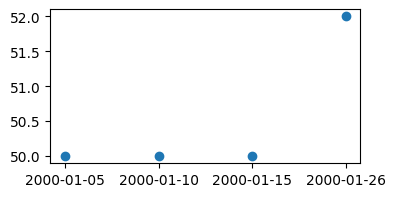

In [57]:
plt.figure(figsize=(4,2))
plt.scatter(df["date"],df["price"], alpha=1)
#plt.xlabel("apartment_area")
#plt.ylabel("price_sale")

In [60]:
plt.style.use('ggplot')

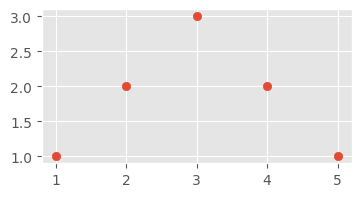

In [61]:
plt.figure(figsize=(4,2))
plt.scatter((1,2,3,4,5),(1, 2, 3, 2,1), alpha=1)

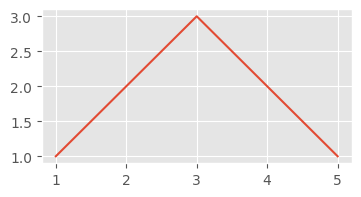

In [62]:
plt.figure(figsize=(4,2))
plt.plot((1,2,3,4,5),(1, 2, 3, 2,1), alpha=1)